In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

In [8]:
df = pd.read_csv('water.csv')

In [9]:
display(df.info())
display(df.head(1).transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


None

,0
Unnamed: 0,1
location,South
town,Bath
mortality,1247
hardness,105


In [25]:
def analyze(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='hardness', y='mortality', data=df)
    plt.title('Точечный график смертность vs жесткость воды')
    plt.xlabel('Water Hardness')
    plt.ylabel('Mortality')
    plt.show()
    pearson_corr, _ = pearsonr(df['hardness'], df['mortality'])
    spearman_corr, _ = spearmanr(df['hardness'], df['mortality'])
    
    print('pearson coef',pearson_corr)
    print('spearman coef',spearman_corr)
    
    X = df['hardness'].values.reshape(-1, 1) 
    y = df['mortality'].values
    model = LinearRegression().fit(X, y)

    y_pred = model.predict(X)
    rsd = y - y_pred
    
    r_squared = model.score(X, y)
    
    print('r_squared',r_squared)
    plt.figure(figsize=(10, 6))
    sns.lineplot(rsd)
    plt.title('График остатков')
    plt.show()

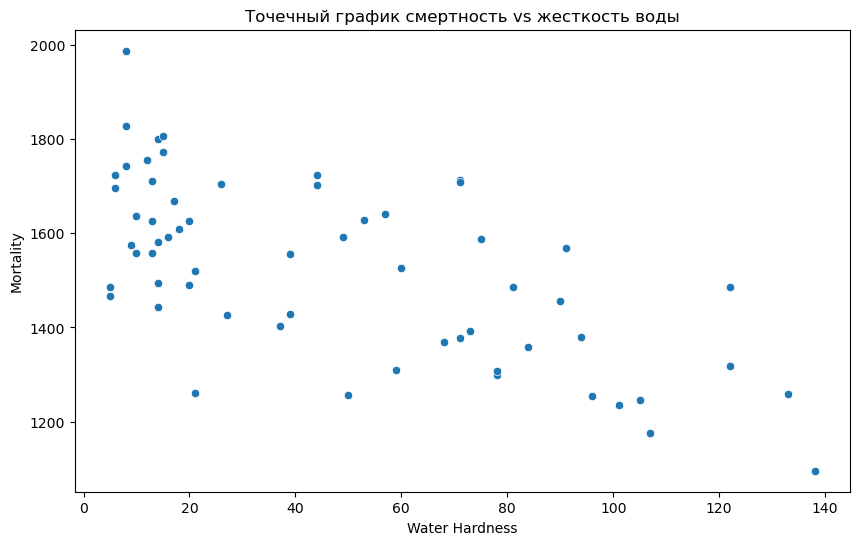

pearson coef -0.6548486232042465
spearman coef -0.6316646189166502
r_squared 0.4288267193124974


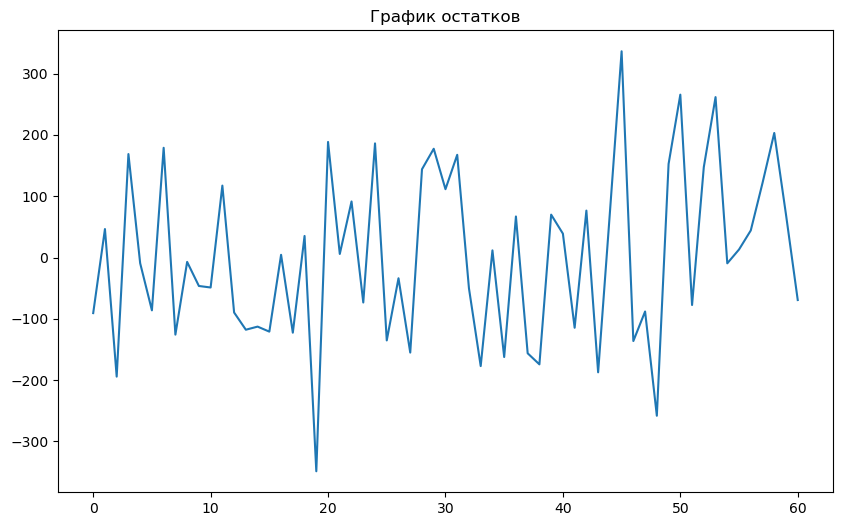

In [26]:
analyze(df)

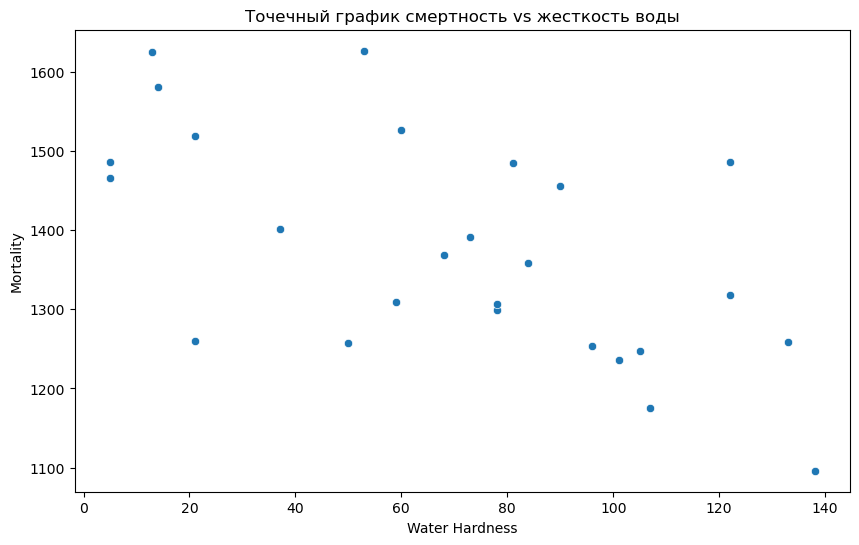

pearson coef -0.6021532715484158
spearman coef -0.5957229185013566
r_squared 0.3625885624364601


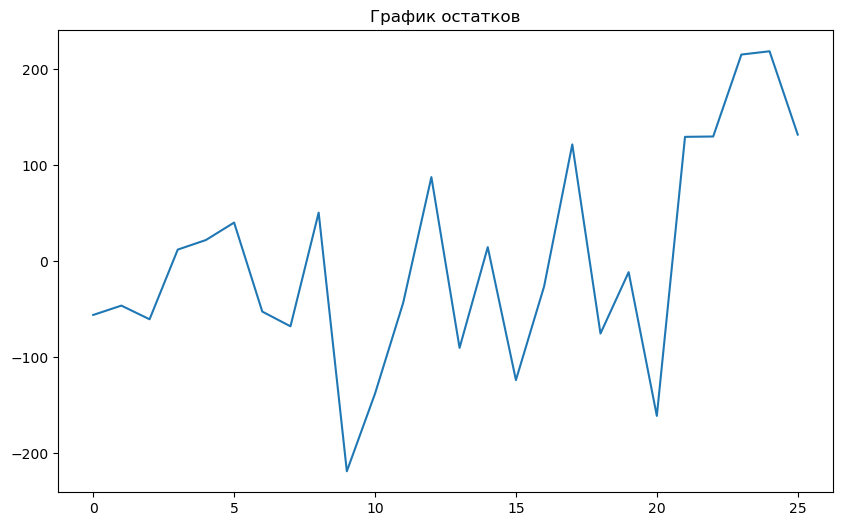

In [27]:
analyze(df.query('location == "South"'))

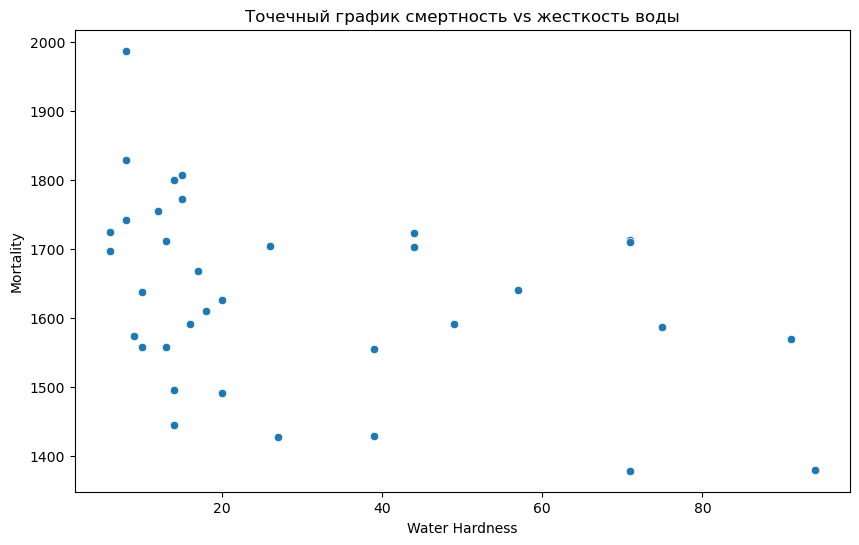

pearson coef -0.36859783832887183
spearman coef -0.4042078956511175
r_squared 0.1358643664207173


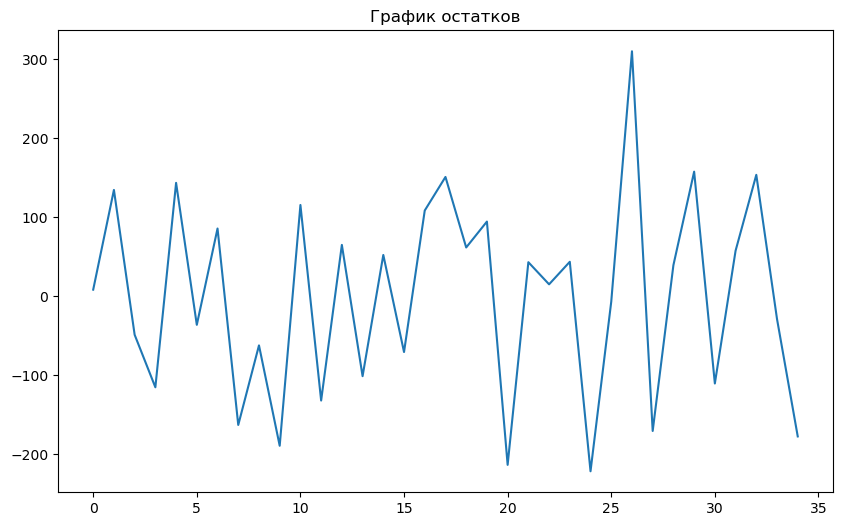

In [28]:
analyze(df.query('location == "North"'))

Зависимость сохраняется, в большей мере для южных городов